### Import libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis 

In [3]:
data = pd.read_excel('./transaction.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
# This dataset contains 100 customers, 12043 transactions across 8 states in Australia.

data.customer_id.nunique()

100

In [6]:
data.transaction_id.nunique()

12043

In [7]:
data.merchant_state.nunique()

8

In [8]:
# check null values. 4326 missing values 

data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [9]:
# No major anomalies here. People's age range from 18 to 78, with an average in 30; 
# There's a huge gap between the maximum and minimum figures in the balance and amount columns. 

data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [10]:
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [11]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

### Transactions

In [12]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions by category')

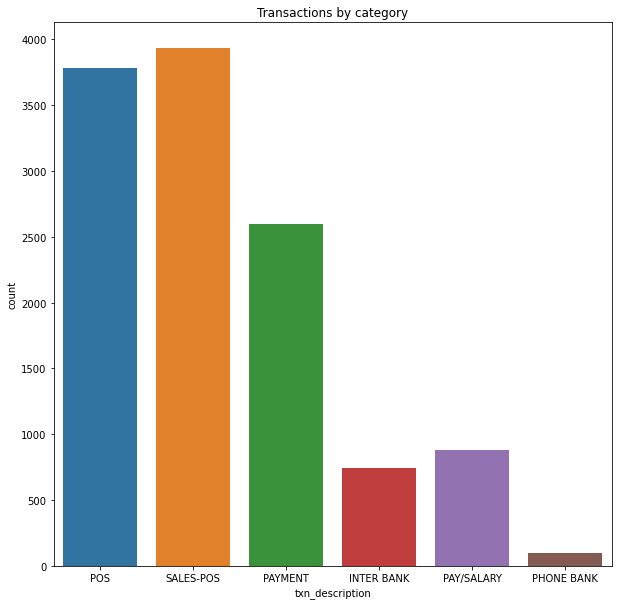

In [14]:
# Most transactions are made by sales, followed by POS. 
# It's worthnothing that phone bank, pay/salary and interbank are also considered as transactions.

plt.figure(figsize = (10,10))
sns.countplot(data.txn_description)
plt.title('Transactions by category')

In [15]:
data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions by category')

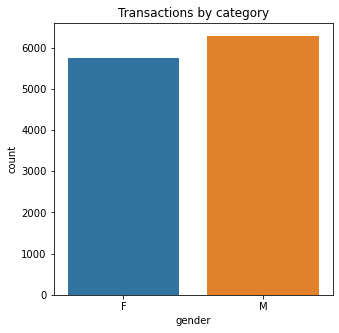

In [16]:
# More male customer

plt.figure(figsize = (5,5))
sns.countplot(data.gender)
plt.title('Transactions by category')

### Transactions by location

In [17]:
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions by state')

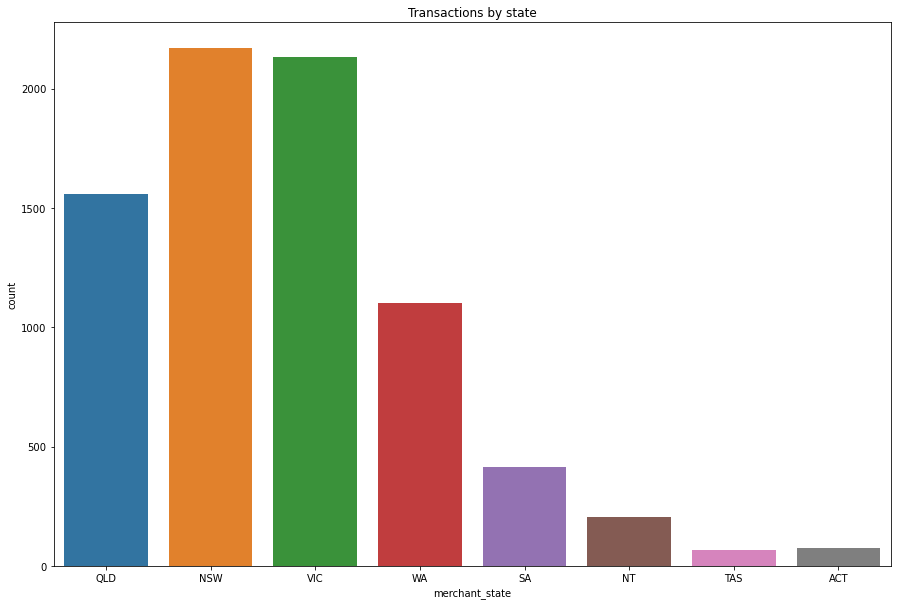

In [18]:
# Most transactions happen in NSW and VIC, followed by QLD and WA.

plt.figure(figsize = (15,10))
sns.countplot(data.merchant_state)
plt.title('Transactions by state')

In [19]:
data['movement'].value_counts()


# most transactions are debit

debit     11160
credit      883
Name: movement, dtype: int64

In [20]:
data.date.describe()

/var/folders/09/_ydqz5x906g2fy5495q2d3f80000gn/T/ipykernel_1129/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

### Daily, weekly and monthly transactions

In [21]:
# average weekly transaction

daily_transaction = data.groupby(pd.Grouper(key='date', freq = 'd'))['amount'].mean()
daily_transaction

date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
                 ...    
2018-10-27     50.155252
2018-10-28     59.007762
2018-10-29    377.932745
2018-10-30    247.891461
2018-10-31    155.795248
Freq: D, Name: amount, Length: 92, dtype: float64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


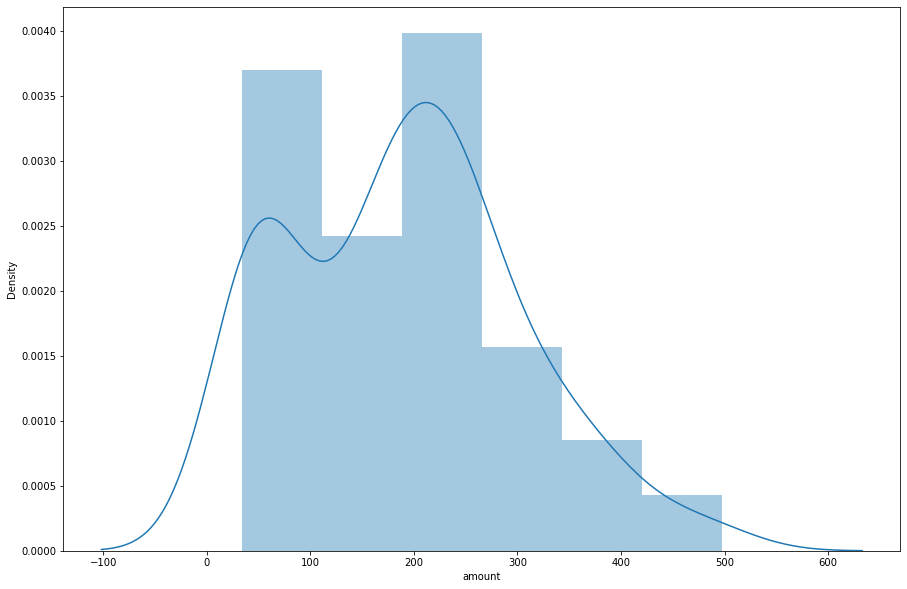

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax = sns.distplot(daily_transaction)

In [23]:
# average weekly transaction

weekly_transaction = data.groupby(pd.Grouper(key='date', freq = 'W'))['amount'].mean()
weekly_transaction

date
2018-08-05    151.315346
2018-08-12    191.737796
2018-08-19    180.216372
2018-08-26    189.795859
2018-09-02    162.706660
2018-09-09    194.403141
2018-09-16    186.912108
2018-09-23    198.120488
2018-09-30    187.498859
2018-10-07    179.005933
2018-10-14    174.715065
2018-10-21    217.294899
2018-10-28    196.041241
2018-11-04    248.730753
Freq: W-SUN, Name: amount, dtype: float64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


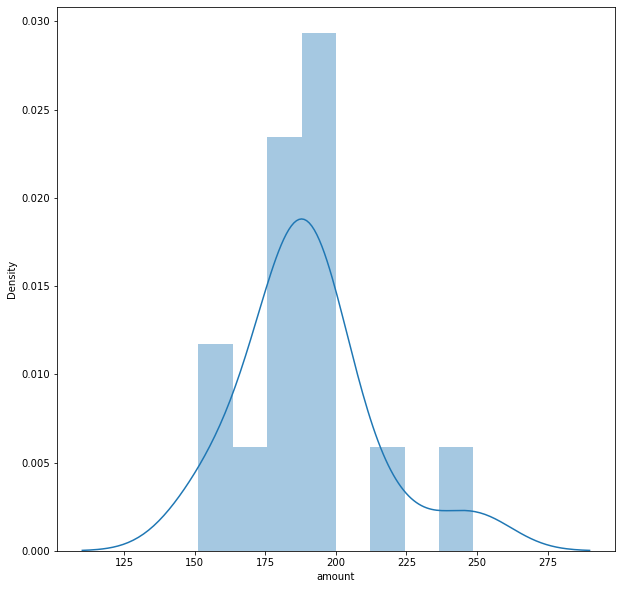

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax = sns.distplot(weekly_transaction)

In [25]:
# transactions each month

monthly_transaction = data.groupby(pd.Grouper(key='date', freq = 'M'))['amount'].mean()
monthly_transaction

date
2018-08-31    185.121867
2018-09-30    182.045903
2018-10-31    196.427323
Freq: M, Name: amount, dtype: float64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


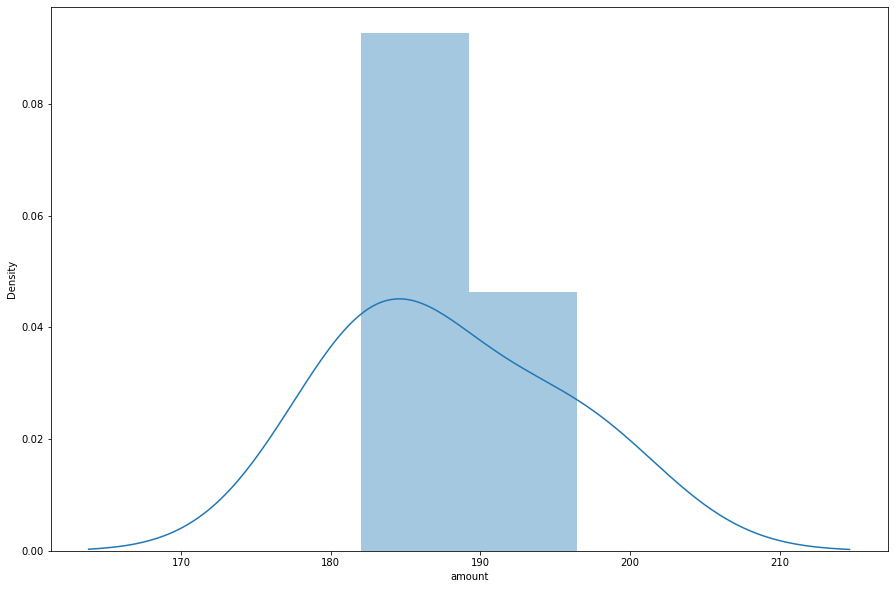

In [26]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax = sns.distplot(monthly_transaction)